<a href="https://colab.research.google.com/github/BrevinBrown/BrevinBrown/blob/main/ML_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Brevin Brown
801096385
4105 HW 3
https://github.com/BrevinBrown/BrevinBrown/blob/main/ML_HW3.ipynb

Problem 1

In [145]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

model = GaussianNB()
breast = load_breast_cancer()
X= breast.data
print(X.shape)
Y=breast.target
model.fit(X,Y)
print(model)

expected = Y
predicted = model.predict(X)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected,predicted))
matrix = metrics.confusion_matrix(expected,predicted)

(569, 30)
GaussianNB()
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       212
           1       0.94      0.97      0.95       357

    accuracy                           0.94       569
   macro avg       0.94      0.93      0.94       569
weighted avg       0.94      0.94      0.94       569

[[189  23]
 [ 10 347]]


using the Naive Bayesian model we get a classifier with a fairly high accuracy that could be implemented. It has a much better rate of identifying malignant correctly rather than benign cancer type. 

Text(0.5, 427.9555555555555, 'Predicted label')

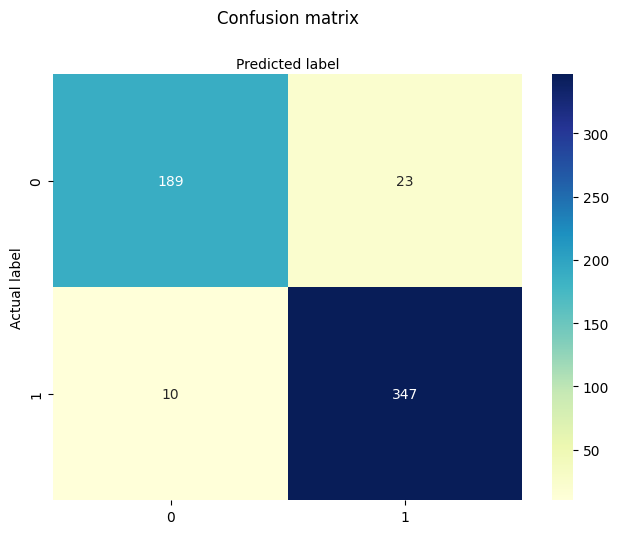

In [146]:







#space here to prevent pdf cutoff of heatmap








fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

logistic regression

In [147]:
XTrain, XTest, YTrain, YTest = train_test_split(breast.data,breast.target, test_size=0.2,random_state=0)
sc_X = StandardScaler()
XTrain = sc_X.fit_transform(XTrain)
XTest = sc_X.transform(XTest)

classifier = LogisticRegression(random_state=1)
classifier.fit(XTrain,YTrain)
YPredict = classifier.predict(XTest)
cnf_matrix = metrics.confusion_matrix(YTest, YPredict)
cnf_matrix


array([[45,  2],
       [ 2, 65]])

In [148]:
print("Accuracy:",metrics.accuracy_score(YTest, YPredict))
print("Precision:",metrics.precision_score(YTest, YPredict))
print("Recall:",metrics.recall_score(YTest, YPredict))

Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433


Text(0.5, 427.9555555555555, 'Predicted label')

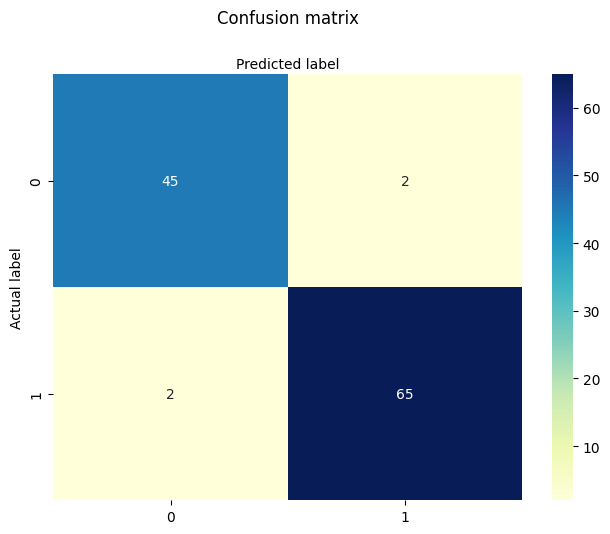

In [149]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

As can be seen from above and though difficult to see from the confusion matrix due to the amount of classifictions due to the scaling done in the logistic regression function we can see from the accuracies, precisions and recalls of the different classifiers. The logistic regression classifier out preforms the Naive Bayes classifier in all categories but harder to make and should take more computational power. This makes sense as the naive baysian model seeks to use the variables as if they are unrelated and that is rather improbable in the real world as things are typically connected

Problem 2

In [150]:
from sklearn.decomposition import PCA

df = pd.DataFrame(breast, columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension','target'])
accuracy = []
precision=[]
recall = []

X2= breast.data
X2 = StandardScaler().fit_transform(X2)
Y2 = breast.target
for n in range(1,30):
  pca = PCA(n_components=n)
  principalComponents = pca.fit_transform(X2)
  principalDf = pd.DataFrame(data = principalComponents)
  finalDf = pd.concat([principalDf, df[['target']]],axis=1)

  XTrain, XTest, YTrain, YTest = train_test_split(principalDf,finalDf.target, test_size=0.2,random_state=0)
  sc_X = StandardScaler()
  XTrain = sc_X.fit_transform(XTrain)
  XTest = sc_X.transform(XTest)

  classifier = LogisticRegression(random_state=1)
  classifier.fit(XTrain,YTrain)
  YPredict = classifier.predict(XTest)
  cnf_matrix = metrics.confusion_matrix(YTest, YPredict)
  #print(cnf_matrix)

  accuracy.append(metrics.accuracy_score(YTest, YPredict))
  precision.append(metrics.precision_score(YTest, YPredict))
  recall.append(metrics.recall_score(YTest, YPredict))



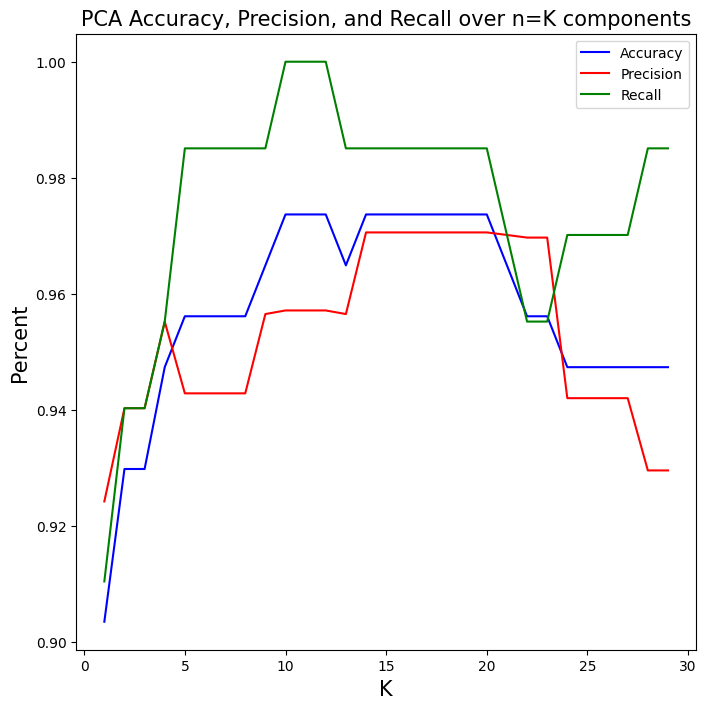

In [151]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('K', fontsize = 15)
ax.set_ylabel('Percent', fontsize = 15)
ax.set_title('PCA Accuracy, Precision, and Recall over n=K components', fontsize = 15)
plt.plot(range(1,30),accuracy,color='blue',label='Accuracy')
plt.plot(range(1,30),precision,color='red',label='Precision')
plt.plot(range(1,30),recall,color='green',label='Recall')
plt.legend()

The best results can be seen from in between principle component amounts around 10 through to around 20. Before that can be seen as to much data is removed and therefore not a good enough amount of data is there to establish a good model underfitting. Above 20 is to much data used and not all of it nessecarily relevant enough to use for the classification and therefor can be removed but in these cases it is not and begins to overfit the model.

Problem 3

In [156]:
accuracy2 = []
precision2=[]
recall2 = []
model2 = GaussianNB()

for i in range(1,30):
  pca = PCA(n_components=i)
  principalComponents3 = pca.fit_transform(breast.data)
  principalDf3 = pd.DataFrame(data = principalComponents3)
  finalDf = pd.concat([principalDf3, df[['target']]],axis=1)
  model2.fit(principalDf3,breast.target)
  expected3 = breast.target
  predicted3 = model2.predict(principalDf3)
  accuracy2.append(metrics.accuracy_score(expected3, predicted3))
  precision2.append(metrics.precision_score(expected3, predicted3))
  recall2.append(metrics.recall_score(expected3, predicted3))


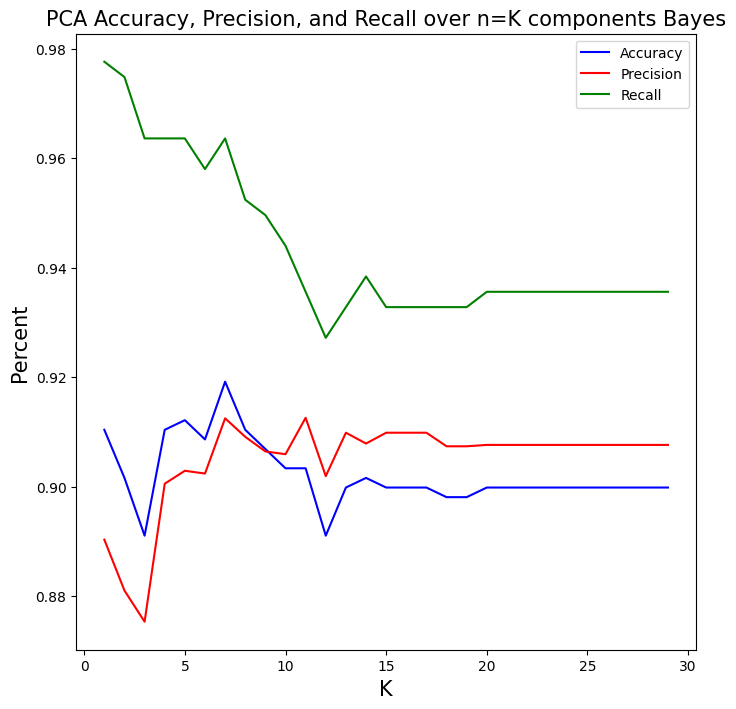

In [157]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('K', fontsize = 15)
ax.set_ylabel('Percent', fontsize = 15)
ax.set_title('PCA Accuracy, Precision, and Recall over n=K components Bayes', fontsize = 15)
plt.plot(range(1,30),accuracy2,color='blue',label='Accuracy')
plt.plot(range(1,30),precision2,color='red',label='Precision')
plt.plot(range(1,30),recall2,color='green',label='Recall')
plt.legend()

Here the Bayes classifier once again shows lower performance than the regression based classifier. The best performance with this classifier is around 7 or 8 principle values after that leveling out to an even level which makes sense as that data should be less relevent and and the more impactful data would be chosen first due to way real data converges.